# Rule Discovery with RUX and RUG

In this short note, we use two standard datasets to demonstrate how to use Rule Extractor (RUX) and the rule generator (RUG) algorithms. First we start with importing the necessary packages that we will use in this note. Note that both RUX and RUG are imported from `rulediscovery`.

In [1]:
import numpy as np
import pandas as pd
import Datasets as DS
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from rulediscovery import RUXClassifier, RUGClassifier

## Seeds Dataset

You can find this dataset and its description on [this page](https://archive.ics.uci.edu/ml/datasets/seeds). This dataset has 210 samples with seven features and three classes. The very last column of the dataframe gives the class labels.

In [2]:
df = np.array(DS.seeds('datasets/'))
X = df[:, 0:-1]
y = df[:, -1]
print('Number of samples: ', len(y))
print('number of features: ', len(X[0,:]))
print('Number of classes: ', len(np.unique(y)))

Number of samples:  210
number of features:  7
Number of classes:  3


To use RUX for interpretation, we first train a Random Forest model and an AdaBoost model. The depth of the trees in both ensemble methods are set to three.

In [3]:
maxDepth = 3

# Random Forest
RF = RandomForestClassifier(max_depth=maxDepth)
RF_fit = RF.fit(X, y)
RF_pred = RF_fit.predict(X)

# AdaBoost
ADA = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', base_estimator=DecisionTreeClassifier(max_depth=maxDepth))
ADA_fit = ADA.fit(X, y)
ADA_pred = ADA_fit.predict(X)

Next, we use RUX to discover the most prominent rules within each ensemble for interpretation. Note that RUX works with a trained model. In its current version, RUX admits either a trained Random Forest model with the parameter `rf` or a trained AdaBoost model with the parameter `ada`. While interpreting the trained Random Forest model, we use the rule length as a cost parameter. Likewise, for the trained AdaBoost model, we use the inverse of the tree weights in the ensemble (the higher the weight of a tree, the less the cost of the rule coming from that tree).

In [4]:
ruleLengthCost = True
useAdaWeights = True

#RUXRF
RUXRF = RUXClassifier(rf=RF_fit, rule_length_cost=ruleLengthCost)
RUXRF_fit = RUXRF.fit(X, y)
RUXRF_pred = RUXRF.predict(X)

#RUXADA
RUXADA = RUXClassifier(ada=ADA_fit, use_ada_weights=useAdaWeights)
RUXADA_fit = RUXADA.fit(X, y)
RUXADA_pred = RUXADA.predict(X)

Our second algorithm RUG itself is a classifier that can be trained like other learning algorithms.

In [5]:
#RUG
RUG = RUGClassifier(max_depth=maxDepth, rule_length_cost=ruleLengthCost)
RUG_fit = RUG.fit(X, y)
RUG_pred = RUG.predict(X)

Here are the accuracies that we obtain with all algorithms.

In [6]:
print('## Accuracy Scores ##')
print('Random Forest: ', accuracy_score(RF_pred, y))
print('AdaBoost: ', accuracy_score(ADA_pred, y)) 
print('RUXRF: ', accuracy_score(RUXRF_pred, y))
print('RUXADA: ', accuracy_score(RUXADA_pred, y))
print('RUG: ', accuracy_score(RUG_pred, y))

## Accuracy Scores ##
Random Forest:  0.9428571428571428
AdaBoost:  1.0
RUXRF:  1.0
RUXADA:  1.0
RUG:  0.9428571428571428


As you can see, we obtain quite good accuracies with all the methods. Let's see the total number of rules each method produces.

In [7]:
print('## Number of Rules ##')
print('Random Forest: ', RUXRF.getInitNumOfRules())
print('AdaBoost: ', RUXADA.getInitNumOfRules())
print('RUXRF: ', RUXRF.getNumOfRules())
print('RUXADA: ', RUXADA.getNumOfRules())
print('RUG: ', RUG.getNumOfRules())

## Number of Rules ##
Random Forest:  691
AdaBoost:  744
RUXRF:  21
RUXADA:  28
RUG:  9


RUX and RUG models produce significantly less number of rules than the ensemble methods. 

So far, we have used the entire dataset for training. Let's get a glimpse of the generalization performances of the above methods. To serve this purpose, we split the data into train-test sets.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Random Forest
RF = RandomForestClassifier(max_depth=maxDepth)
RF_fit = RF.fit(X_train, y_train)
RF_pred = RF_fit.predict(X_test)

# AdaBoost
ADA = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', base_estimator=DecisionTreeClassifier(max_depth=maxDepth))
ADA_fit = ADA.fit(X_train, y_train)
ADA_pred = ADA_fit.predict(X_test)

#RUXRF
RUXRF = RUXClassifier(rf=RF_fit, rule_length_cost=ruleLengthCost)
RUXRF_fit = RUXRF.fit(X_train, y_train)
RUXRF_pred = RUXRF.predict(X_test)

#RUXADA
RUXADA = RUXClassifier(ada=ADA_fit, use_ada_weights=useAdaWeights)
RUXADA_fit = RUXADA.fit(X_train, y_train)
RUXADA_pred = RUXADA.predict(X_test)

#RUG
RUG = RUGClassifier(max_depth=maxDepth)
RUG_fit = RUG.fit(X_train, y_train)
RUG_pred = RUG.predict(X_test)

print('## Accuracy Scores ##')
print('Random Forest: ', accuracy_score(RF_pred, y_test))
print('AdaBoost: ', accuracy_score(ADA_pred, y_test)) 
print('RUXRF: ', accuracy_score(RUXRF_pred, y_test))
print('RUXADA: ', accuracy_score(RUXADA_pred, y_test))
print('RUG: ', accuracy_score(RUG_pred, y_test))

print('\n## Number of Rules ##')
print('Random Forest: ', RUXRF.getInitNumOfRules())
print('AdaBoost: ', RUXADA.getInitNumOfRules())
print('RUXRF: ', RUXRF.getNumOfRules())
print('RUXADA: ', RUXADA.getNumOfRules())
print('RUG: ', RUG.getNumOfRules())

## Accuracy Scores ##
Random Forest:  0.8412698412698413
AdaBoost:  0.9523809523809523
RUXRF:  0.9047619047619048
RUXADA:  0.9206349206349206
RUG:  0.9206349206349206

## Number of Rules ##
Random Forest:  614
AdaBoost:  742
RUXRF:  19
RUXADA:  20
RUG:  24


We can also look at the discovered rules. Here are the **first five** rules sorted in descending order of weights.

In [9]:
RUG.printRules(indices=range(5))

RULE 0:
4.79 < x[6] <= 5.60
x[0] <= 13.11

Class: 2
Scaled rule weight: 1.0000

RULE 1:
2.50 < x[5] <= 4.49
x[0] > 15.24

Class: 1
Scaled rule weight: 0.5171

RULE 2:
x[4] <= 3.53
x[5] <= 3.57

Class: 0
Scaled rule weight: 0.4156

RULE 3:
x[2] <= 0.90
x[6] > 5.14
x[1] > 13.73

Class: 1
Scaled rule weight: 0.4099

RULE 4:
x[0] <= 13.65
x[4] > 2.94

Class: 2
Scaled rule weight: 0.3934



## Banknote Dataset

The details of this dataset are given on [this page](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). There are 1,372 samples with four features. Each sample is labeled as a genuine or a forged banknote (binary classification).

In [10]:
df = np.array(DS.banknote('datasets/'))
X = df[:, 0:-1]
y = df[:, -1]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)    

maxDepth = 3

# Random Forest
RF = RandomForestClassifier(max_depth=3)
RF_fit = RF.fit(X_train, y_train)
RF_pred = RF_fit.predict(X_test)

# AdaBoost
ADA = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', base_estimator=DecisionTreeClassifier(max_depth=3))
ADA_fit = ADA.fit(X_train, y_train)
ADA_pred = ADA_fit.predict(X_test)

#RUXRF
RUXRF = RUXClassifier(rf=RF_fit, rule_length_cost=ruleLengthCost)
RUXRF_fit = RUXRF.fit(X_train, y_train)
RUXRF_pred = RUXRF.predict(X_test)

#RUXADA
RUXADA = RUXClassifier(ada=ADA_fit, use_ada_weights=useAdaWeights)
RUXADA_fit = RUXADA.fit(X_train, y_train)
RUXADA_pred = RUXADA.predict(X_test)

#RUG
RUG = RUGClassifier(max_depth=maxDepth, rule_length_cost=ruleLengthCost)
RUG_fit = RUG.fit(X_train, y_train)
RUG_pred = RUG.predict(X_test)

In [11]:
print('## Accuracy Scores ##')
print('Random Forest: ', accuracy_score(RF_pred, y_test))
print('AdaBoost: ', accuracy_score(ADA_pred, y_test)) 
print('RUXRF: ', accuracy_score(RUXRF_pred, y_test))
print('RUXADA: ', accuracy_score(RUXADA_pred, y_test))
print('RUG: ', accuracy_score(RUG_pred, y_test))

print('\n## Number of Rules ##')
print('Random Forest: ', RUXRF.getInitNumOfRules())
print('AdaBoost: ', RUXADA.getInitNumOfRules())
print('RUXRF: ', RUXRF.getNumOfRules())
print('RUXADA: ', RUXADA.getNumOfRules())
print('RUG: ', RUG.getNumOfRules())

## Accuracy Scores ##
Random Forest:  0.9223300970873787
AdaBoost:  0.9951456310679612
RUXRF:  0.9854368932038835
RUXADA:  0.9902912621359223
RUG:  0.9878640776699029

## Number of Rules ##
Random Forest:  715
AdaBoost:  757
RUXRF:  25
RUXADA:  43
RUG:  13


Although RUG discovers 13 rules, we can look at the **first ten rules** sorted in terms of their weights. Using these these ten rules, we can also check how would the accuracy have changed, if we had constructed different subsets in a nested manner by adding one more rule each time. Note that the `predict` function of RUG can also be used with only a subset of the discovered rules (see the comment in the below code snippet). This construction allows us to give an _interpretation plot_.

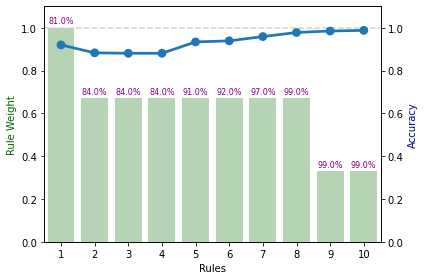

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

selectedRuleNum = 10 

weights = np.round(RUG.getWeights()[:selectedRuleNum], decimals=2)
accuracies = []
coverages = []

for indx in range(min(selectedRuleNum, RUG.getNumOfRules())):
    # Use only the first indx+1 many rules for prediction
    RUG_pred_test = RUG.predict(X_test, range(indx+1))
    accuracies.append(accuracy_score(RUG_pred_test, y_test))
    coverages.append(RUG.getNumOfMissed())
    
accuracies = np.round(accuracies, decimals=3)
coverages = np.round(1.0-(np.array(coverages)/len(y)), decimals=2)*100
coverages = np.round(coverages, decimals=1)
txtmisses = [str(cover)+'%' for cover in coverages]


# Plotting
data = {'Rules': [indx+1 for indx in range(len(accuracies))],
        'Weights': weights,
        'Coverages': coverages,
        'Accuracies': accuracies}

df = pd.DataFrame(data, columns=data.keys())

fig, ax1 = plt.subplots()
sns.color_palette('pastel')

bars = sns.barplot(data=df, x='Rules', y=weights, ax=ax1, 
                   color='green', alpha=0.3)

for indx, txtmiss in enumerate(txtmisses):
    bars.annotate(txtmiss, xy=(indx, weights[indx]+0.02), 
                  color='purple', horizontalalignment='center',
                  fontsize=8)

bars.axhline(1.0, color='lightgray', linestyle='--')
    
ax1.set_ylabel('Rule Weight', color='darkgreen')
ax1.set_ylim([0.0, 1.1])

ax2 = ax1.twinx()

sns.pointplot(data=df, x='Rules', y='Accuracies', ax=ax2)
ax2.set_ylabel('Accuracy', color='darkblue')
ax2.set_ylim(ax1.get_ylim())
ax2.grid(False)

fig.tight_layout()

This interpretation plot shows that RUG reaches a high accuracy with the first 10 rules that are ordered in terms of their normalized weights (bar heights). The percentages show the
cumulative fractions of the samples covered after adding each rule.